In [79]:
%%capture
! pip3 install ipywidgets

In [81]:
# perform required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import seaborn as sns
import sklearn.linear_model as lm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [76]:
# Read the clean model
df = pd.read_csv("data" + os.path.sep + "autos_85_clean.csv")

#Let us only use the numeric data
df = df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-lpg,highway-mpg,price,diesel,gas
0,3,122,88.6,0.811148,0.324786,-2.029015,2548,130,3.47,2.68,9.0,111,5000.0,11.190476,27,13495.0,0,1
1,3,122,88.6,0.811148,0.324786,-2.029015,2548,130,3.47,2.68,9.0,111,5000.0,11.190476,27,16500.0,0,1
2,1,122,94.5,0.822681,0.444444,-0.558319,2823,152,2.68,3.47,9.0,154,5000.0,12.368421,26,16500.0,0,1
3,2,164,99.8,0.848630,0.504274,0.217881,2337,109,3.19,3.40,10.0,102,5500.0,9.791667,30,13950.0,0,1
4,2,164,99.4,0.848630,0.521368,0.217881,2824,136,3.19,3.40,8.0,115,5500.0,13.055556,22,17450.0,0,1


In [18]:
# Split the data into training and testing sets
x_data = df[["horsepower", "engine-size", "curb-weight", "highway-mpg"]]
print(x_data.dtypes)
print("x_data type: " + str(type(x_data)))

y_data = df[["price"]]
print("x_data type: " + str(type(y_data)))

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 0)

horsepower     int64
engine-size    int64
curb-weight    int64
highway-mpg    int64
dtype: object
x_data type: <class 'pandas.core.frame.DataFrame'>
x_data type: <class 'pandas.core.frame.DataFrame'>


In [24]:
# Generalization error is measure of how well our data does at predicting previously unseen data

def plot_distributions(Y, Yhat, text = ""):
    ax1 = sns.distplot(Y, hist = False, color = "green", label = "Actual value")
    sns.distplot(Yhat, hist = False, color = "red", label = "Predicted value", ax = ax1)
    plt.title(text)
    plt.show() 
    plt.close()

In [20]:
# Train the model on the train data

# Instantiate the linear model
lm = LinearRegression()

# Fit the model
lm.fit(x_train, y_train)

# Predict the values
y_train_hat = lm.predict(x_train)

In [21]:
# Test the model on the test data

# Predict the values
y_test_hat = lm.predict(x_test)

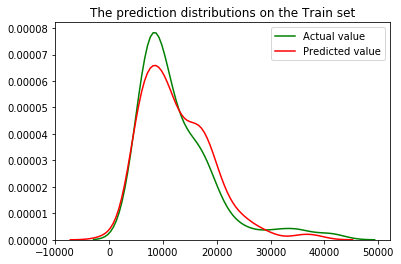

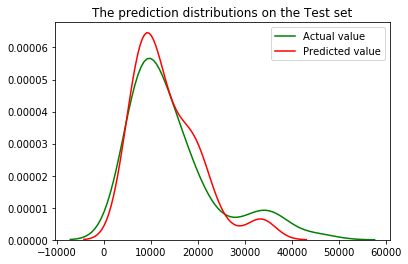

In [26]:
# Plot the data
plot_distributions(y_train, y_train_hat, text = "The prediction distributions on the Train set")
plot_distributions(y_test, y_test_hat, text = "The prediction distributions on the Test set")

In [83]:
# Cross validation is used to get a good estimate of the Generaliation error
# Here the data is split in a number of equal parts and then all combinations
# are used to do training and testing and estimating the Generalization errror
# Then the average of the errors is used as an estimate of an out of sample error.

lm = LinearRegression()

#We have 4 buckets and a linear model plus the result is the R-square scores
scores = cross_val_score(lm, x_data, y_data, cv=4)

print(scores)
print("Generalization error estimate: ", scores.mean(), "and the standard deviation is: " , scores.std())

[0.84471795 0.78566743 0.56406991 0.46316488]
Generalization error estimate:  0.664405042265976 and the standard deviation is:  0.15635060931945782


In [86]:
# We can use negative squared error as a score by setting the
# parameter  'scoring' metric to 'neg_mean_squared_error'. 
-1 * cross_val_score(lm, x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error')

array([20240865.23167852, 43737944.37864213, 12470270.77569642,
       17574447.8797166 ])

In [37]:
# We can also just get the y_hat values for the cross validations

lm = LinearRegression()

#We have 4 buckets and a linear model plus the result is the R-square scores
y_hat = cross_val_predict(lm, x_data, y_data, cv=4)

In [38]:
# When fitting with polynomials:
# Under fitting - is when the order is not high enough to follow the actual function of the data
# Over fitting - is when the order is t too high and the model fits the noise
#                This is especially apparent by that the model follow the data points very well
#                but for the areas where there is no data, the function wildly ascelates
# The best order of the polynomial to be chosen based on the testing error. The order is to be
# increased until the test error decreases and then starts increasing again.

# The noise is random and it is usually called an irreducible error

# It is possible that the function the data comes from is not polynomial, e.g. 
# sinus or cosinus then the polynomial model will be good to fit the data well

The best order of polynomial is: 5


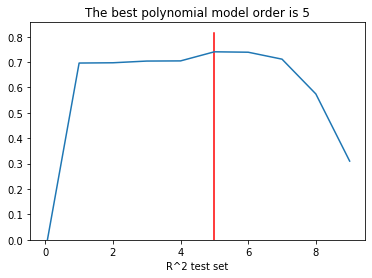

In [56]:
# Let us do a training for several order polynomials
RSQU_test = []
degrees = range(10)

#Just use one predictor for now
x_train_p = x_train[["horsepower"]]
x_test_p = x_test[["horsepower"]]

lr = LinearRegression()

for n in degrees:
    # Create the transformer
    pr = PolynomialFeatures(degree = n)
    
    #Train the model
    x_train_pr = pr.fit_transform(x_train_p)
    lr.fit(x_train_pr, y_train)
    
    #Test the model
    x_test_pr = pr.fit_transform(x_test_p)
    RSQU_test.append(lr.score(x_test_pr, y_test))

# The best order of polynomial is
min_rsqu = np.min(RSQU_test)
max_rsqu = np.max(RSQU_test)
best_order = degrees[RSQU_test.index(max_rsqu)]
print("The best order of polynomial is: " + str(best_order))

plt.xlabel("Order polynomial model")
plt.xlabel("R^2 test set")
plt.title("The best polynomial model order is " + str(best_order))
plt.plot([best_order, best_order], [min_rsqu*0.5, max_rsqu*1.1], color = "red")
plt.ylim(0,)
plt.plot(degrees, RSQU_test)
plt.show()
plt.close()

In [58]:
# Ridge regression prevents overfitting
# The latter is also a big problem when there are
# many predictors (features/independent variables)
rm = Ridge(alpha = 0.1)

rm.fit(x_train, y_train)

y_test_hat = rm.predict(x_test)

# The parameter alpha tuning is to be done on to maximize the
# score on the test set which is then called a validation set

In [89]:
# Model parameters are called Hyperparameters, Scikit-
# lean allows to do grid seqrch tuning of those

params = [{'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'normalize' : [True, False]}]

rr = Ridge()

gs = GridSearchCV(rr, params, cv = 4)

gs.fit(x_data, y_data)

print("Best estimator: " + str(gs.best_estimator_))
print("\nBest estimator test R^2 score: ", gs.best_estimator_.score(x_test, y_test))

print("\nMean test scores: " + str(gs.cv_results_['mean_test_score']))

scores = gs.cv_results_

print("\nTest scores for different prarameters: ")
for param, mean_val in zip(scores['params'], scores['mean_test_score']) : 
    print(param, "R^2 on test data: ", mean_val)

Best estimator: Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

Best estimator test R^2 score:  0.8337054082996833

Mean test scores: [ 0.66497709  0.66440505  0.66966027  0.6644051   0.69334688  0.66440563
  0.6900439   0.66441088  0.32128586  0.66446305  0.01692918  0.66495255
 -0.03033666  0.66792625 -0.03531086  0.67237476 -0.03581087  0.65694618]

Test scores for different prarameters: 
{'alpha': 0.001, 'normalize': True} R^2 on test data:  0.664977086330754
{'alpha': 0.001, 'normalize': False} R^2 on test data:  0.6644050481058323
{'alpha': 0.01, 'normalize': True} R^2 on test data:  0.6696602729239574
{'alpha': 0.01, 'normalize': False} R^2 on test data:  0.6644051006641821
{'alpha': 0.1, 'normalize': True} R^2 on test data:  0.6933468831453846
{'alpha': 0.1, 'normalize': False} R^2 on test data:  0.6644056262129681
{'alpha': 1, 'normalize': True} R^2 on test data:  0.6900438990625194
{'alpha': 